## Table of Contents
* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Importing Data](#2.-Importing-Data)
* [3. Cleaning And Preparing Data](#3.-Cleaning-And-Preparing-Data)
* [4. Regression Analysis](#4.-Regression-Analysis)

## 1. Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Importing Data

In [42]:
# Define path

path = r'C:\Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 6 SDG'

In [43]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','sdg_clean.csv'))

## 3. Cleaning And Preparing Data

In [44]:
df.head()

,Unnamed: 0,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,...,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships
0,0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,2,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,3,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,4,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


In [45]:
df.shape

(3818, 21)

In [46]:
# Dropping the 'Unnamed: 0' index column

df = df.drop('Unnamed: 0', axis=1)

In [47]:
df.columns

Index(['country', 'year', 'sdg_index', 'no_poverty', 'zero_hunger',
       'good_health', 'quality_education', 'gender_equality', 'clean_water',
       'affordable_energy', 'economic_growth', 'infrastructure_innovation',
       'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
       'climate_action', 'underwater_life', 'land_life', 'peace_justice',
       'partnerships'],
      dtype='object')

##### Missing values

In [48]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

country                      0
year                         0
sdg_index                    0
no_poverty                   0
zero_hunger                  0
good_health                  0
quality_education            0
gender_equality              0
clean_water                  0
affordable_energy            0
economic_growth              0
infrastructure_innovation    0
reduced_inequalities         0
sustainable_cities           0
responsible_consumption      0
climate_action               0
underwater_life              0
land_life                    0
peace_justice                0
partnerships                 0
dtype: int64

##### Duplicates check

In [49]:
dups = df.duplicated()

In [50]:
dups.shape # No dups

(3818,)

##### Extreme values checks

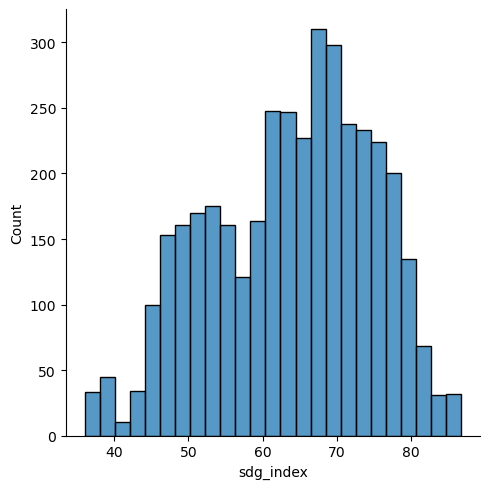

In [51]:
sns.displot(df['sdg_index'], bins=25) # Shows extreme values

# No extreme values

In [52]:
df['sdg_index'].mean() # Check the mean

63.850288108957564

In [53]:
df['sdg_index'].median() # Check the median

65.4

In [54]:
df['sdg_index'].max() # Check the max

86.8

In [55]:
df['sdg_index'].min() # Check the max

36.0

### Data Prep for Regression Analysis

#### Since SDG Index and Goal 'Good Health' have the highest correlation, these are the variables I'll be looking into via regression analysis.
#### Hypothesis: The higher the Good Health and Well-Being Goal score, the higher the SDG Index

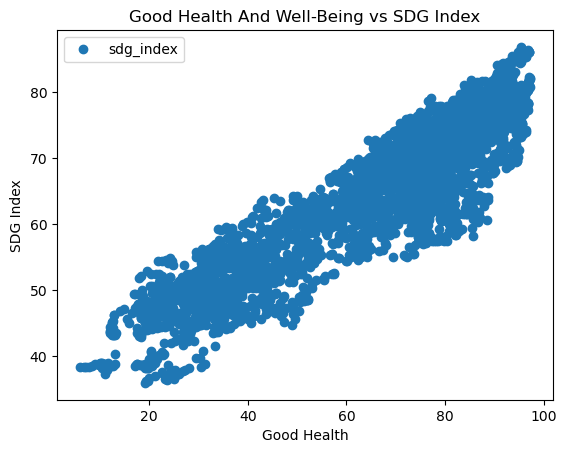

In [56]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'good_health', y='sdg_index',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Good Health And Well-Being vs SDG Index')  
plt.xlabel('Good Health')  
plt.ylabel('SDG Index')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['good_health'].values.reshape(-1,1)
y = df['sdg_index'].values.reshape(-1,1)

In [58]:
X

array([[19.2],
       [19.4],
       [19.7],
       ...,
       [41.5],
       [41.9],
       [41.9]])

In [59]:
y

array([[36. ],
       [36.3],
       [36.3],
       ...,
       [54.3],
       [54.8],
       [55.6]])

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [61]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

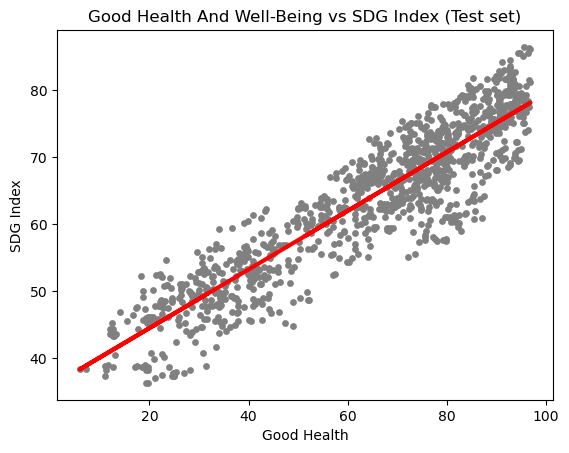

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Good Health And Well-Being vs SDG Index (Test set)')
plot_test.xlabel('Good Health')
plot_test.ylabel('SDG Index')
plot_test.show()

#### The line seems to fit fairly well, however, there are many points spread paralel to it, so it doesn't cover all of the points. Linear Regression indicates that the means of the data points are close to the regression line, even if some points are spread out.

In [65]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [66]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43714454]]
Mean squared error:  20.482203945441853
R2 score:  0.8371733567736034


In [67]:
np.sqrt(0.8299067910871107)

0.9109922014414342

In [68]:
y_predicted

array([[58.28607727],
       [72.23098804],
       [54.96377878],
       ...,
       [75.2035709 ],
       [63.09466719],
       [49.4557576 ]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,60.2,58.286077
1,68.6,72.230988
2,49.0,54.963779
3,60.0,57.542932
4,51.4,48.537754
5,73.5,71.531557
6,76.1,77.083292
7,82.0,76.209003
8,65.7,65.936107
9,43.6,41.499727


#### The model summary statistics:

Mean squared error:  20.869725694446725  
R2 score:  0.8299067910871107

The lower the MSE, the better fitting the model is. 20 is a pretty low number, indicating that the model is fitting the data.  
R2 metric tells you how well the model explains the variance in the data, the closer to 0 the poorer fit. In our case. 0.8 is quite high.

These metrics tell us that the model is a good fit.

#### Actual vs Predicted

Given the fact that there are so many data points that are outside of the regression line (visual inspection), we can see that the predicted numbers in the dataframe above are not as accurate as the metrics above might lead us to believe.  

##### Compare how the regression fits the training set

In [75]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [76]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [77]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43714454]]
Mean squared error:  19.81708427577148
R2 score:  0.8295383693828228


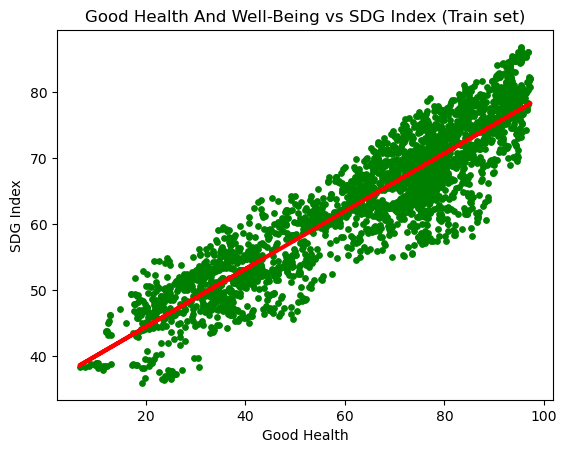

In [78]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Good Health And Well-Being vs SDG Index (Train set)')
plot_test.xlabel('Good Health')
plot_test.ylabel('SDG Index')
plot_test.show()

#### Comparing the Model performance on the Training Set With the Test Set

Comparing the metrics, we can see that they are only slightly better on the training set than on the test set, which means that I didn't overfit the model.

#### Overall thoughts

While looking at the pair plot (6.2 Exploring Relationships), there are several Goals that seem to have a linear relationship with the SDG Index, it would probably be beneficial to carry a out multiple regression analysis. However one of the prerequisites is for the independant variables not to correlate between each other, and in our case, most goals do. Which means that regression analysis is maybe not the best fit for this dataset. 